## Observations and Insights 

In [256]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import scipy.stats as sts
import numpy as np
import sklearn.datasets as dta

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset.  
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_data_complete.head(50)
# Combine the data into a single dataset

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [257]:
len(mouse_data_complete["Mouse ID"].unique())

249

In [258]:
len(mouse_data_complete)

1893

In [259]:
# Checking the number of mice.
len(mouse_data_complete["Mouse ID"].unique())

249

In [260]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data = mouse_data_complete.groupby("Mouse ID").count() >2
mouse_data.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,True,True,True,True,True,True,True
a251,True,True,True,True,True,True,True
a262,True,True,True,True,True,True,True
a275,True,True,True,True,True,True,True
a366,True,True,True,True,True,True,True


In [261]:
df2 = pd.DataFrame(mouse_data)
df2

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,True,True,True,True,True,True,True
a251,True,True,True,True,True,True,True
a262,True,True,True,True,True,True,True
a275,True,True,True,True,True,True,True
a366,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
z435,True,True,True,True,True,True,True
z578,True,True,True,True,True,True,True
z581,True,True,True,True,True,True,True


In [262]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
len_data = mouse_data.loc[mouse_data["Timepoint"] == True]
len_data.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,True,True,True,True,True,True,True
a251,True,True,True,True,True,True,True
a262,True,True,True,True,True,True,True
a275,True,True,True,True,True,True,True
a366,True,True,True,True,True,True,True


In [263]:
# Getting the number of duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
len(len_data)

222

In [264]:
# Mice that are not duplicate
picked_by_staff_df = mouse_data.loc[mouse_data["Timepoint"] == False]
picked_by_staff_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b447,False,False,False,False,False,False,False
c326,False,False,False,False,False,False,False
d133,False,False,False,False,False,False,False
f278,False,False,False,False,False,False,False
f394,False,False,False,False,False,False,False
f932,False,False,False,False,False,False,False
h428,False,False,False,False,False,False,False
h531,False,False,False,False,False,False,False
l872,False,False,False,False,False,False,False


In [265]:
# Mice that are not duplicate
len(picked_by_staff_df)


27

In [266]:
# Optional: Get all the data for the duplicate mouse ID. 

len_data.head(223)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,True,True,True,True,True,True,True
a251,True,True,True,True,True,True,True
a262,True,True,True,True,True,True,True
a275,True,True,True,True,True,True,True
a366,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
z435,True,True,True,True,True,True,True
z578,True,True,True,True,True,True,True
z581,True,True,True,True,True,True,True


In [267]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
picked_by_staff_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b447,False,False,False,False,False,False,False
c326,False,False,False,False,False,False,False
d133,False,False,False,False,False,False,False
f278,False,False,False,False,False,False,False
f394,False,False,False,False,False,False,False
f932,False,False,False,False,False,False,False
h428,False,False,False,False,False,False,False
h531,False,False,False,False,False,False,False
l872,False,False,False,False,False,False,False


In [268]:
# Checking the number of mice in the clean DataFrame.
len(picked_by_staff_df)

27

In [269]:

mouse_uniq_data = mouse_data_complete.loc[mouse_data_complete["Timepoint"] == 0]
mouse_uniq_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [270]:
len(mouse_uniq_data)

250

## Summary Statistics

In [271]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tm_vol = mouse_data_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")
#tm_vol = dr_gr["Tumor Volume (mm3)"]
#tm_vol = mouse_data_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")

mean_numpy = np.mean(tm_vol)
print(f"The mean of Regimen and tumor volumes {mean_numpy}")

median_numpy = np.median(tm_vol)
print(f"The median  Regimen and tumor volumes  is {median_numpy}")

mode_scipy = sts.mode(tm_vol)
print(f"The mode  Regimen and tumor volumes  is {mode_scipy}")

#age_purch_total = purchase_data_df.groupby(["Age Range"]).sum()["Price"].rename("Total Purchase Value")
#age_avg = purchase_data_df.groupby(["Age Range"]).mean()["Price"].rename("Average Purchase Price")
#age_counts = purchase_data_df.groupby(["Age Range"]).count()["Price"].rename("Purchase Count")

var_numpy = np.var(tm_vol,ddof = 0)
print(f"The variance Regimen and tumor volumes  is  using the NumPy module is {var_numpy}")

sd_numpy = np.std(tm_vol,ddof = 0)
print(f"The standard deviation of Regimen and tumor volumes  is  standard deviation using the NumPy module is {sd_numpy}")


The mean of Regimen and tumor volumes 50.97614439183376
The median  Regimen and tumor volumes  is 53.06065083009446
The mode  Regimen and tumor volumes  is ModeResult(mode=array([40.21674507]), count=array([1]))
The variance Regimen and tumor volumes  is  using the NumPy module is 28.43944177281429
The standard deviation of Regimen and tumor volumes  is  standard deviation using the NumPy module is 5.3328643122448085


In [272]:
#x_axis = np.arange(len(mouse_data_complete["Drug Regimen"].unique()))
#tick_locations = [value+0.4 for value in x_axis]
#plt.figure(figsize=(20,3))
#x_df = mouse_data_complete.groupby("Drug Regimen").count()["Mouse ID"].rename("Mouse ID")
#y_df = mouse_data_complete.groupby("Drug Regimen").count()["Mouse ID"].rename("Mouse ID")
#plt.bar(x_axis, mice_cnt, color='r', alpha=0.8, align="center")
#plt.xticks(tick_locations,x_axis, rotation="vertical")

## Bar and Pie Charts

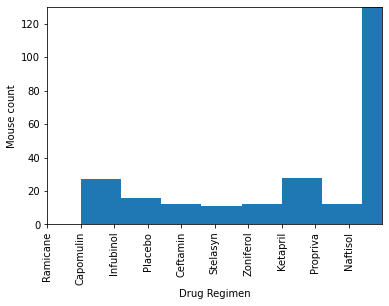

NormaltestResult(statistic=45.57961974191985, pvalue=1.2662262990605297e-10)


In [273]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_cnt = mouse_data_complete.groupby("Mouse ID").count()["Drug Regimen"].rename("Drug Regimen")
#mice_cnt
uniq_dr = mouse_data_complete["Drug Regimen"].unique()
# This method produces everything in a single groupby function
x_axis = np.arange(len(mouse_data_complete["Drug Regimen"].unique()))
tick_locations = [value for value in x_axis]
plt.hist(mice_cnt)
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse count')
plt.xticks(tick_locations,uniq_dr, rotation="vertical")
plt.xlim(0, 10)
plt.ylim(0, 130)
plt.show()
print(sts.normaltest(mice_cnt.sample(200)))

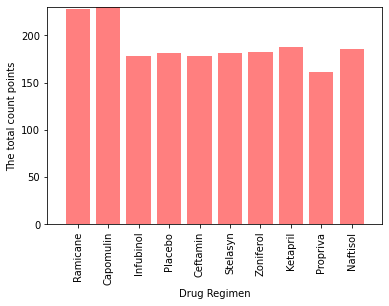

NormaltestResult(statistic=28.392274522418614, pvalue=6.834329653156625e-07)


In [279]:
# This is for Drug regimen and number of data points
uniq_dr = mouse_data_complete["Drug Regimen"].unique()
data_points = mouse_data_complete.groupby("Drug Regimen").count()["Mouse ID"].rename("Mouse ID")
e_x = []
for x in uniq_dr:
    inc_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == x]
    e_x.append(len(inc_data))
#e_x = [mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == x] for x in uniq_dr]

x_x_axis = np.arange(len(uniq_dr))
tick_locations = [value for value in x_x_axis]
plt.bar(x_axis, e_x, color='r', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('The total count points')
plt.xticks(tick_locations,uniq_dr,rotation="vertical")
plt.xlim(-1, 10)
plt.ylim(0, 230)
plt.show()
print(sts.normaltest(mice_cnt.sample(200)))


In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#pie_vol = mouse_data_complete.groupby("Sex").mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")

#male_mice_data = mouse_data_complete.loc[mouse_data_complete["Sex"] == "Male"]
#female_mice_data = mouse_data_complete.loc[mouse_data_complete["Sex"] == "Female"]
#male_mice_data = male_mice_data.count()
#female_mice_data = female_mice_data.count()
#battle_data = male_mice_data.add(female_mice_data, fill_value=0)
#battle_data.plot(kind="pie")
#battle_data.plot(kind="bar", facecolor="red")

#gender_groups = mouse_data_complete.groupby('Sex')

# Find out how many of each gender took bike trips
#gender_trips = gender_groups['tripduration'].count()

# Drop the 'stoptime' row that is contained within our group
#gender_trips = gender_trips.drop(gender_trips.index[3])

#mice_cnt = mouse_data_complete.groupby("Sex")
#mice_cnt
#gender_trips = gender_trips.drop(gender_trips.index[3])
#male_mice_data = mouse_data_complete.loc[mouse_data_complete["Sex"] == "Male"]
#female_mice_data = mouse_data_complete.loc[mouse_data_complete["Sex"] == "Female"]
#male_mice_data = male_mice_data.count()
#female_mice_data = female_mice_data.count()

#battle_data = male_mice_data.add(female_mice_data, fill_value=0)

# Chart our data, give it a title, and label the axes
#gender_chart = mice_cnt.plot(kind="bar", title="Bike Trips by Gender", subplots=True)
#gender_chart.set_xlabel("Sex")
#gender_chart.set_ylabel("Male and Female")

#plt.show()
#plt.tight_layout()

In [196]:
gender_groups = mouse_data_complete.groupby('Sex')
gender_groups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


958
935


([<matplotlib.patches.Wedge at 0x20aff9a9e20>,
 [Text(-0.022900912879184103, 1.1997814585120492, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.013358865846190724, 0.699872517465362, '51%'),
  Text(0.011450456439592244, -0.5998907292560246, '49%')])

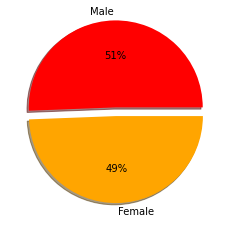

In [226]:
# Labels for the sections of our pie chart
gender_data =["Male", "Female"]
male_mice_data = mouse_data_complete.loc[mouse_data_complete["Sex"] == "Male"]
female_mice_data = mouse_data_complete.loc[mouse_data_complete["Sex"] == "Female"]

print(f'{len(male_mice_data)}')
print(f'{len(female_mice_data)}')

cnt_val= [len(male_mice_data),len(female_mice_data)]
# The colors of each section of the pie chart
colors = ["red", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(cnt_val, explode=explode, labels=gender_data, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=0)

In [198]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [199]:


capa_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin"]
rami_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ramicane"]
infu_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Infubinol"]
ceft_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ceftamin"] 

tail_capa_data =  capa_regi_data.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
tail_rami_data =  rami_regi_data.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
tail_infu_data =  infu_regi_data.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
tail_ceft_data =  ceft_regi_data.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
print(f' the final tumor volume on Capomulin {tail_capa_data.head()}')
print(f' the final tumor volume on Ramicane {tail_rami_data.head()}')
print(f' the final tumor volume on Infubinol {tail_infu_data.head()}')
print(f' the final tumor volume on Ceftamin {tail_ceft_data.head()}')

time_capa_data =  mouse_data_complete.groupby("Mouse ID").max()["Timepoint"]
print(f' the final Timepoint based on mouse id  on Capomulin {tail_capa_data.head()}')

cmp_capa_data = pd.merge(tail_capa_data,time_capa_data, how='inner', on=['Mouse ID', 'Mouse ID'])

print(f' the final cmp_capa_data based on mouse id  on Capomulin {cmp_capa_data.head()}')
#last_capa_data =  mouse_data_complete.groupby("Mouse ID").tail(1)
#print(f' the final last_capa_data based on mouse id  on Capomulin {last_capa_data.head()}')

tail_capa1_data =  capa_regi_data.groupby("Mouse ID").tail(1)["Tumor Volume (mm3)"]
#
tail_capa_data = pd.merge(tail_capa_data,tail_capa1_data, how='outer', on=['Tumor Volume (mm3)', 'Tumor Volume (mm3)'])
#tail_capa_data
#max_ceft_data = ceft_regi_data.groupby("Mouse ID").max()["Timepoint"]
#max_ceft_data
#times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
#fig1, ax1 = plt.subplots()
#ax1.set_title('Reaction Times at Baseball Batting Cage')
#ax1.set_ylabel('Reaction Time (ms)')
#ax1.boxplot(times)
#plt.show()

 the final tumor volume on Capomulin Mouse ID
b128    45.651331
b742    45.000000
f966    45.000000
g288    46.304003
g316    46.809225
Name: Tumor Volume (mm3), dtype: float64
 the final tumor volume on Ramicane Mouse ID
a411    45.466677
a444    45.000000
a520    45.000000
a644    46.910892
c458    45.722279
Name: Tumor Volume (mm3), dtype: float64
 the final tumor volume on Infubinol Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
Name: Tumor Volume (mm3), dtype: float64
 the final tumor volume on Ceftamin Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
Name: Tumor Volume (mm3), dtype: float64
 the final Timepoint based on mouse id  on Capomulin Mouse ID
b128    45.651331
b742    45.000000
f966    45.000000
g288    46.304003
g316    46.809225
Name: Tumor Volume (mm3), dtype: float64
 the final cmp_capa_data based on mouse id  on Capomulin                    Tumor Volume (mm3)  Timep

In [200]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capa_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin"]
rami_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ramicane"]
infu_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Infubinol"]
ceft_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ceftamin"] 
print(f' the capa_regi_data tumor volume on Capomulin {capa_regi_data["Mouse ID"]}')
tail_capa_data =  capa_regi_data.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
tail_rami_data =  rami_regi_data.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
tail_infu_data =  infu_regi_data.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
tail_ceft_data =  ceft_regi_data.groupby("Mouse ID").max()["Tumor Volume (mm3)"]
print(f' the final tumor volume on Capomulin {tail_capa_data.head()}')
print(f' the final tumor volume on Ramicane {tail_rami_data.head()}')
print(f' the final tumor volume on Infubinol {tail_infu_data.head()}')
print(f' the final tumor volume on Ceftamin {tail_ceft_data.head()}')


# Start by getting the last (greatest) timepoint for each mouse

time_capa_data =  mouse_data_complete.groupby("Mouse ID").max()["Timepoint"]
print(f' the final Timepoint based on mouse id  on Capomulin {tail_capa_data.head()}')


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cmp_capa_data = pd.merge(tail_capa_data,time_capa_data, how='inner', on=['Mouse ID', 'Mouse ID'])

print(f' the final cmp_capa_data based on mouse id  on Capomulin {cmp_capa_data.head()}')


 the capa_regi_data tumor volume on Capomulin 10      s185
11      s185
12      s185
13      s185
14      s185
        ... 
440     i557
1452    r157
1453    r157
1454    r157
1455    r157
Name: Mouse ID, Length: 230, dtype: object
 the final tumor volume on Capomulin Mouse ID
b128    45.651331
b742    45.000000
f966    45.000000
g288    46.304003
g316    46.809225
Name: Tumor Volume (mm3), dtype: float64
 the final tumor volume on Ramicane Mouse ID
a411    45.466677
a444    45.000000
a520    45.000000
a644    46.910892
c458    45.722279
Name: Tumor Volume (mm3), dtype: float64
 the final tumor volume on Infubinol Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
Name: Tumor Volume (mm3), dtype: float64
 the final tumor volume on Ceftamin Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
Name: Tumor Volume (mm3), dtype: float64
 the final Timepoint based on mouse id  on Capomulin Mouse ID


The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 56.29220039
The  iqr interquartile range of tumor volume is: 11.292200389999998
The the median of tumor volume is: 48.95147442 
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.
The mean Tumor is: 49.37
The standard deviation of all  Tumor is: 3.37


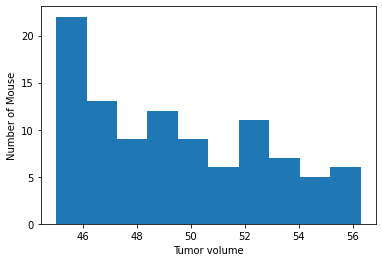

In [201]:
# Put treatments into a list for for loop (and later for plot labels)
list_plt = mouse_data_complete["Drug Regimen"].unique()
list_plt
# Create empty list to fill with tumor vol data (for plotting)
tmr_plt = mouse_data_complete["Tumor Volume (mm3)"]
tmr_plt_list = []
tmr_plt
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tmr_plt.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The  iqr interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")



# Locate the rows which contain mice on each drug and get the tumor volumes
mouse_data_complete["Tumor Volume (mm3)"] = mouse_data_complete["Tumor Volume (mm3)"].astype('float')
tmr_plt_list = mouse_data_complete.loc[mouse_data_complete["Tumor Volume (mm3)"] >= lowerq]
tmr_plt_list = tmr_plt_list.loc[tmr_plt_list["Tumor Volume (mm3)"] <= upperq]


# add subset 
#http://localhost:8888/notebooks/01-Lesson-Plans/05-Matplotlib/3/Activities/05-Par_Standard_Error/Solved/samples.ipynb
subset = tmr_plt_list.sample(100)
subset


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


print(f'The mean Tumor is: {round(subset["Tumor Volume (mm3)"].mean(),2)}')
print(f'The standard deviation of all  Tumor is: {round(subset["Tumor Volume (mm3)"].std(),2)}')
plt.hist(subset["Tumor Volume (mm3)"])
plt.xlabel("Tumor volume")
plt.ylabel("Number of Mouse")
plt.show()

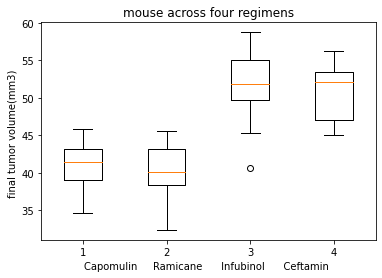

In [224]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tail_capa_data =  capa_regi_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
tail_rami_data =  rami_regi_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
tail_infu_data =  infu_regi_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
tail_ceft_data =  ceft_regi_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]


fig1, ax1 = plt.subplots()
ax1.set_title('mouse across four regimens')
ax1.set_ylabel('final tumor volume(mm3) ')
ax1.set_xlabel('Capomulin     Ramicane      Infubinol      Ceftamin ')
data = [ tail_capa_data, tail_rami_data, tail_infu_data, tail_ceft_data]
ax1.boxplot(data)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'The tumor volume')

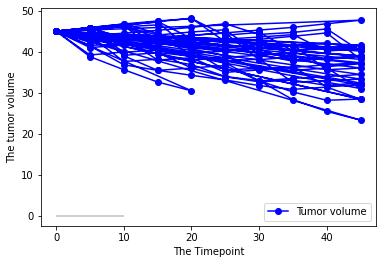

In [203]:
# Each point on the sine chart is marked by a blue circle
# taken mouse ID "s185" for testing purposes
# if we include more mouse the data becomes more clustered
#capa_regi_data = capa_regi_data.loc[capa_regi_data["Mouse ID"] == "s185"]
x_axis = capa_regi_data["Timepoint"]
sin = capa_regi_data["Tumor Volume (mm3)"]

sine_handle, = plt.plot(x_axis, sin, marker ='o', color='blue', label="Tumor volume")
plt.hlines(0, 0, 10, alpha=0.25)
plt.legend(loc="lower right")
plt.xlabel("The Timepoint")
plt.ylabel("The tumor volume")

(38.0, 50.0)

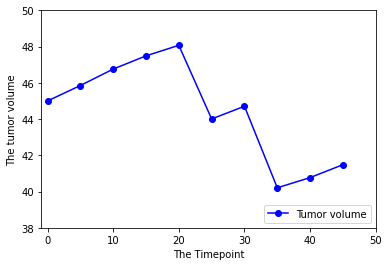

In [232]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capa_regi_data_mouse = capa_regi_data.loc[capa_regi_data["Mouse ID"] == "l509"]
x_axis = capa_regi_data_mouse["Timepoint"]
sin = capa_regi_data_mouse["Tumor Volume (mm3)"]

sine_handle, = plt.plot(x_axis, sin, marker ='o', color='blue', label="Tumor volume")
plt.hlines(0, 0, 10, alpha=0.25)
plt.legend(loc="lower right")
plt.xlabel("The Timepoint")
plt.ylabel("The tumor volume")
plt.xlim(-1, 50)
plt.ylim(38, 50)

Text(0, 0.5, 'Avg Tumor volume for capomulin')

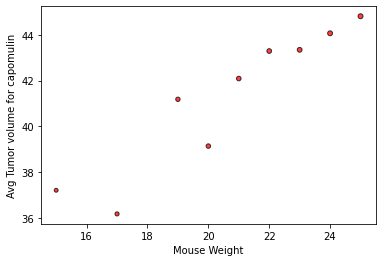

In [296]:
#print(f' the capa_regi_data tumor volume on Capomulin {capa_regi_data["Tumor Volume (mm3)"]}')
tail_avg_capa_data =  capa_regi_data.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]
uniq_wt = (capa_regi_data["Weight (g)"].unique())
#x_axis = tail_avg_capa_data["Weight (g)"]
#ag_cnt_df = (capa_regi_data.loc(capa_regi_data["Tumor Volume (mm3)"]))
#tail_avg_capa_data

#capa_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin"]
#rami_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ramicane"]
#infu_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Infubinol"]
#ceft_regi_data = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ceftamin"] 
#tail_avg_rami_data =  rami_regi_data.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]
#e_x = []
#for x in uniq_wt:
#    inc_data = rami_regi_data.loc[rami_regi_data["Weight (g)"] == x]
#    e_x.append(inc_data)

#tail_avg_rami_data =  e_x.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]    
#tail_avg = [tail_avg_capa_data, e_x]
x_axis = uniq_wt
#e_x = e_x.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]
#tail_avg_rami_data
#len(tail_avg)
#len(x_axis)
#tail_avg = tail_avg_capa_data["Tumor Volume (mm3)"]
#x_axis = tail_avg_capa_data["Weight (g)"]
plt.scatter(x_axis, tail_avg_capa_data, marker="o", facecolors="red", edgecolors="black",
          s=x_axis, alpha=0.75)
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor volume for capomulin")
#tail_avg_capa_data.head()


Text(0, 0.5, 'Avg Tumor volume for capomulin')

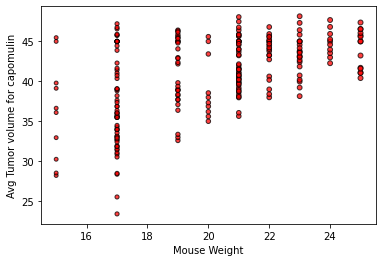

In [208]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#tail_avg_capa_data =  capa_regi_data.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]
tail_avg_capa_data =  capa_regi_data["Tumor Volume (mm3)"]
uniq_wt = (capa_regi_data["Weight (g)"])
#x_axis = tail_avg_capa_data["Weight (g)"]
#ag_cnt_df = (capa_regi_data.loc(capa_regi_data["Tumor Volume (mm3)"]))
#tail_avg_capa_data

tail_avg = tail_avg_capa_data
x_axis = uniq_wt

#len(tail_avg)
#len(x_axis)
#tail_avg = tail_avg_capa_data["Tumor Volume (mm3)"]
#x_axis = tail_avg_capa_data["Weight (g)"]
plt.scatter(x_axis, tail_avg, marker="o", facecolors="red", edgecolors="black",
           s=x_axis, alpha=0.75)
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor volume for capomulin")
#tail_avg_capa_data.head()

## Correlation and Regression

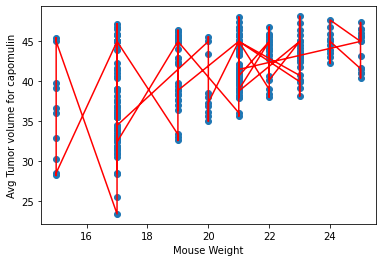

The r-squared is: 0.2763600223455911
The r-line_eq is: y = 0.96x + 21.49


In [211]:
# Perform a linear regression on violent crime rate versus year
tail_avg_capa_data =  capa_regi_data["Tumor Volume (mm3)"]
uniq_wt = (capa_regi_data["Weight (g)"])
#x_axis = tail_avg_capa_data["Weight (g)"]
#ag_cnt_df = (capa_regi_data.loc(capa_regi_data["Tumor Volume (mm3)"]))
#tail_avg_capa_data

tail_avg = tail_avg_capa_data
x_axis = uniq_wt
x_values = x_axis
y_values = tail_avg_capa_data
#y_values = crime_dta.iloc[:,0]
(mice_slope, mice_intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
mice_regress_values = x_values * mice_slope + mice_intercept
line_eq = "y = " + str(round(mice_slope,2)) + "x + " + str(round(mice_intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,y_values,"r-")
#plt.annotate(line_eq,(2000,1),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor volume for capomulin')
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(f"The r-line_eq is: {line_eq}")

In [212]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_values,y_values)

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53
